In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, \
    GradientBoostingClassifier, HistGradientBoostingClassifier, VotingClassifier,RandomForestRegressor
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
# from category_encoders import BinaryEncoder
# from sklearn.preprocessing import OneHotEncoder

# from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
# from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor  

In [72]:
df = pd.read_excel('dataset.xlsx')

# EDA

In [56]:
categorical_cols = ['Year','Genre','Sequel']
numerical_cols = ['Gross','Ratings','Budget','Screens','Views','Likes','Dislikes','Comments','Aggregate Followers']

In [57]:
df_pro = df.drop('Movie',axis=1)

In [58]:
df_pro['Sentiment'] = df_pro['Sentiment'].apply(lambda x:-1 if x<0 else 1 if x>0 else 0)

In [59]:
X = df_pro.drop('Sentiment',axis =1 )
y = df_pro['Sentiment']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('ordinal', OrdinalEncoder(handle_unknown='error'))
])

# bool_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant')),
#     ('bool', BinaryEncoder())
# ])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
#         ('cat', categorical_transformer, categorical_cols)
#         ,
#         ('bool',bool_transformer,bool_cols)
    ])

In [62]:
# param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
model3 = ExtraTreesClassifier(n_estimators=50, max_depth=None,min_samples_split=2, random_state=0)
model4 = AdaBoostClassifier()
model5 = XGBClassifier(n_estimators=45)
model6 = GradientBoostingClassifier(n_estimators=70,random_state=0)
model7 = HistGradientBoostingClassifier(max_iter=65)
model8 = GaussianNB()
# model9 = RandomForestClassifier(n_estimators=100, random_state=0)
model10 = SVC()

In [63]:
vc = VotingClassifier(estimators=[('DT', model1),
                                  ('KNN', model2),
                                  ('ET', model3),
                                  ('AD',model4),
                                  ('XG',model5),
                                  ('GB',model6),
                                  ('GNB',model8),
                                  ('HGB',model7),
#                                   ('RF',model9),
                                  ('SVC',model10)],
                      voting='hard')

params_grid_vc = {'SVC__C': [0.1,1,10,100,1000], 'XG__gamma': [1,0.1,0.01,0.001,0.0001]}
model = GridSearchCV(estimator=vc,param_grid=params_grid_vc,cv=5)

In [64]:
# model = RandomForestClassifier(n_estimators=70, random_state=0)

In [65]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('scaler',MinMaxScaler()),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         8
           0       0.62      0.65      0.64        23
           1       0.65      0.72      0.68        39

    accuracy                           0.61        70
   macro avg       0.43      0.46      0.44        70
weighted avg       0.57      0.61      0.59        70



# regression

In [66]:
X_reg = df.drop(['Gross','Movie'],axis=1)

In [67]:
y_reg = df['Gross']

In [68]:
categorical_cols = ['Year','Genre','Sequel']
numerical_cols = ['Ratings','Budget','Screens','Views','Likes','Dislikes','Comments','Aggregate Followers']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [70]:
from cubist import Cubist
# model = Cubist()
# model = LinearRegression()
# model = RandomForestRegressor(n_estimators=1000,random_state=0)

reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1,n_estimators=250)
reg3 = LinearRegression()
reg4 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
model1 = DecisionTreeRegressor()
model2 = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2 ) 
model3 = ExtraTreesRegressor(n_estimators=150, max_depth=None,min_samples_split=2, random_state=0)
model4 = AdaBoostRegressor()

model = VotingRegressor(estimators=[('gb', reg1),
                                   ('rf', reg2),
                                   ('lr', reg3),
                                   ('xg',reg4),
                                   ('dt',model1),
                                  ('knn',model2),
#                                    ('et',)
                                  ])

In [71]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('scaler',StandardScaler()),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_test)

# Evaluate the model
score = mean_absolute_error(y_test, preds)

ValueError: A given column is not a column of the dataframe

In [53]:
print(score)

29538106.22970166


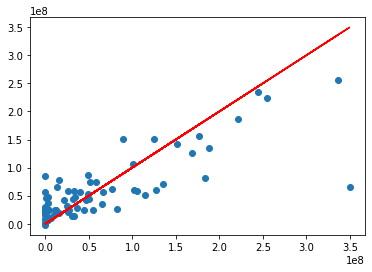

In [54]:
import matplotlib.pyplot as plt
plt.scatter(y_test,preds)
plt.plot(y_test,y_test,'r')